# Module 4 Lesson 3

We will cover Module 4 Lesson 3
- Bringing numeric data to the same scale
- Other types of transformations
- Finding outlying data points
- How to deal with outliers?

**Problem Statement & Data Description**

*Client: ABC Retail, Incorporated, rest-of-the-world division* 

***Project name: Online retail sales analysis*** 

An online retailer, ABC, Inc., operates in nearly 100 countries worldwide, selling furniture, office supplies and technology products to customers in three segments: consumer, corporate and home office. ABC, Inc. is a US-based company, and it has two major divisions: US and rest of the world. We are working with the rest of the world division of the company. 

They have provided us with online sales transaction data from 2011 to 2014.

We are given 3 datasets:-

1. Data on each sale; 51290 records; all data in US dollars
It contains fields like
**order_id** (identifier) ,order_date ,ship_date ,ship_mode ,**customer_id**(identifier) ,product_id ,category ,sub_category ,product_name ,sales ,quantity ,discount ,profit ,shipping_cost ,order_priority ,**vendor_code** (identifier) 


2. Data on the customers; 1590 records 
It contains fields like
**customer_id** (identifier) ,customer_name ,city ,state ,country ,postal_code ,segment ,market ,region 

3. Data on vendors who supply the retailer; 65 records 
It contains fields like
vendor ,**vendor_code** (identifier) 

We need to analyze the data and need to provide answer to different questions asked by company officials.

In [1]:
#reading the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# Use the warning filter context manager to temporarily suppress warnings
warnings.filterwarnings("ignore")

sales = pd.read_csv('sales_data.csv')
cust = pd.read_csv(r'customers.csv',encoding='iso-8859-1')
vend = pd.read_csv(r'vendors.csv')
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,vendor_code
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,1.03,Medium,VE_001
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.45,Medium,VE_002
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.63,Medium,VE_003
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.37,Medium,VE_004
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.79,Medium,VE_005


In [2]:
sales=sales.merge(cust,on='customer_id',how='left')
sales.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,...,order_priority,vendor_code,customer_name,city,state,country,postal_code,segment,market,region
0,1,MX-2014-143658,02/10/2014,06/10/2014,Standard Class,SC-20575,OFF-LA-10002782,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",...,Medium,VE_001,Sonia Cooley,Mexico City,Distrito Federal,Mexico,NaN,Consumer,LATAM,LATAM-North
1,2,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-FU-10004015,Furniture,Furnishings,"Tenex Clock, Durable",...,Medium,VE_002,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South
2,3,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,FUR-BO-10002352,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",...,Medium,VE_003,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South
3,4,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-BI-10004428,Office Supplies,Binders,"Cardinal Binder, Clear",...,Medium,VE_004,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South
4,5,MX-2012-155047,15/10/2012,20/10/2012,Standard Class,KW-16570,OFF-AR-10004594,Office Supplies,Art,"Sanford Canvas, Water Color",...,Medium,VE_005,Kelly Williams,Dos Quebradas,Risaralda,Colombia,NaN,Consumer,LATAM,LATAM-South


### Q.1.Use robustscaler & Minmaxscaler for scaling the profit column. See what differences you are getting.

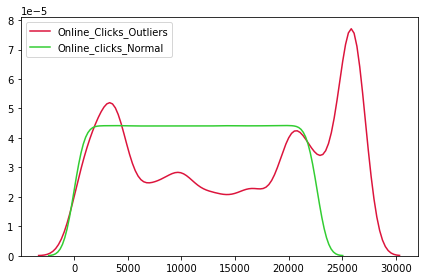

In [5]:
# Write your code here
from sklearn.preprocessing import RobustScaler, MinMaxScaler
rs = RobustScaler()
mms = MinMaxScaler()

sales['Profit_RS'] = rs.fit_transform(sales[['profit']])

sales['Profit_MMS'] = mms.fit_transform(sales[['profit']])

sns.kdeplot(data = sales['Profit_RS'].cumsum(), color='crimson',label = 'Online_Clicks_Outliers')

sns.kdeplot(data=sales['Profit_MMS'].cumsum(),color='limegreen',label='Online_clicks_Normal')

plt.tight_layout()
plt.show()

In [6]:
pd.concat([sales['Profit_RS'].describe().reset_index(), sales['Profit_MMS'].describe().reset_index()],axis=1)

,index,Profit_RS,index,Profit_MMS
0,count,51290.000000,count,51290.000000
1,mean,0.526242,mean,0.441907
2,std,4.736239,std,0.011623
3,min,-179.549525,min,0.000000
4,25%,-0.251019,25%,0.440000
5,50%,0.000000,50%,0.440616
6,75%,0.748981,75%,0.442454
7,max,227.947188,max,1.000000


### Q.2. Find Lower end outliers for Profit .
Hint:- (A point is called outlier if it lies +-1.5 times IQR from Q1 & Q3)

In [10]:
# Write your code here
def lower_end_outliers(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col]< (Q1-1.5*IQR))]
    outliers.sort_values(by=col, ascending=True, inplace=True)
    return outliers

lower_end_outliers(data=sales,col='profit').shape[0]

3526

### Q.3) Apply log-transformation & polynomial-transformation on sales column 

In [11]:
# Write your code here
sales['sales_log'] = np.log(sales['sales'])

degree=2
sales['sales_poly'] = np.power(sales['sales'],degree)

In [12]:
sales['sales_log'].describe()

count    51290.000000
mean         4.483598
std          1.457851
min         -0.811931
25%          3.426170
50%          4.443275
75%          5.525665
max         10.027406
Name: sales_log, dtype: float64

In [13]:
sales['sales_poly'].describe()

count    5.129000e+04
mean     2.984730e+05
std      3.329684e+06
min      1.971360e-01
25%      9.460930e+02
50%      7.234013e+03
75%      6.302771e+04
max      5.125008e+08
Name: sales_poly, dtype: float64

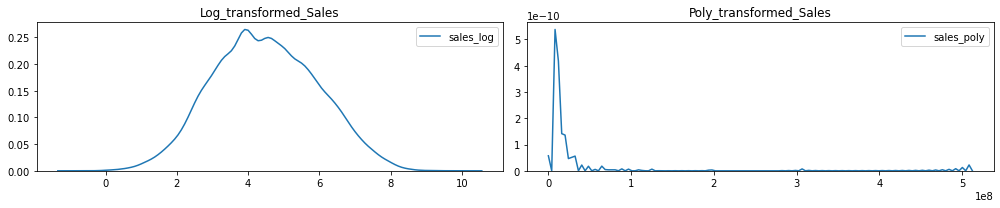

In [16]:
fig, axes = plt.subplots(1,2, figsize=(14,3))

sns.kdeplot(sales['sales_log'],ax=axes[0])
axes[0].set_title('Log_transformed_Sales')

sns.kdeplot(sales['sales_poly'],ax=axes[1])
axes[1].set_title('Poly_transformed_Sales')

plt.tight_layout()
plt.show()

## Solutions

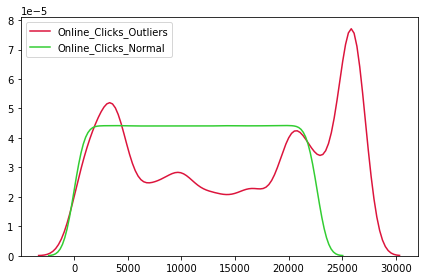

In [6]:
#Q.1) 
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler to the 'NumericColumn'
sales['Profit_RS'] = robust_scaler.fit_transform(sales[['profit']])

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Apply MinMaxScaler to the 'NumericColumn' (which has already been transformed by RobustScaler)
sales['Profit_MMS'] = minmax_scaler.fit_transform(sales[['profit']])

#fig, axes = plt.subplots(1,3,figsize=(14, 3))

#sns.kdeplot(data=sales['profit'], label='Online_Clicks_Normal', fill=True)

sns.kdeplot(data=sales['Profit_RS'].cumsum(),
            color='crimson', label='Online_Clicks_Outliers')


sns.kdeplot(data=sales['Profit_MMS'].cumsum(),
             color='limegreen', label='Online_Clicks_Normal')

plt.tight_layout()
plt.show()

In [7]:
pd.concat([sales['Profit_MMS'].describe().reset_index(),sales['Profit_RS'].describe().reset_index()],axis=1)

,index,Profit_MMS,index,Profit_RS
0,count,51290.000000,count,51290.000000
1,mean,0.441907,mean,0.526242
2,std,0.011623,std,4.736239
3,min,0.000000,min,-179.549525
4,25%,0.440000,25%,-0.251019
5,50%,0.440616,50%,0.000000
6,75%,0.442454,75%,0.748981
7,max,1.000000,max,227.947188


We can see changes in mean , std, min ,25%,50%,75% ,max when we are scaling datset.

**Can you write down few points differnetiating Robust scaler & minmaxscaler ?**

In [8]:
#Q.2)
### IQR method is used for detecting outliers , by IQR method outliers are those which lie below Q1-1.5*IQR & above Q3+1.5IQR where Q1, Q3 are 1st & 3rd quartile , IQR is interquaritle range.
def detect_lowerend_outliers(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1   
    outliers = data[(data[col] < (Q1 - 1.5 * IQR))]
    outliers.sort_values(col,ascending=True,inplace=True)
    return outliers
   

In [9]:
detect_lowerend_outliers(data=sales,col='profit').shape[0]

3526

In [10]:
# Apply log transformation to the 'sales' column
sales['sales_log'] = np.log(sales['sales'])

# Apply polynomial transformation to the 'sales' column (e.g., squaring)
degree = 2  # You can change this to the desired degree (e.g., 2 for squaring)
sales['sales_poly'] = np.power(sales['sales'], degree)

In [11]:
sales['sales_log'].describe()

count    51290.000000
mean         4.483598
std          1.457851
min         -0.811931
25%          3.426170
50%          4.443275
75%          5.525665
max         10.027406
Name: sales_log, dtype: float64

In [12]:
sales['sales_poly'].describe()

count    5.129000e+04
mean     2.984730e+05
std      3.329684e+06
min      1.971360e-01
25%      9.460930e+02
50%      7.234013e+03
75%      6.302771e+04
max      5.125008e+08
Name: sales_poly, dtype: float64

Note down the observations in different statsitics which you are able to observe

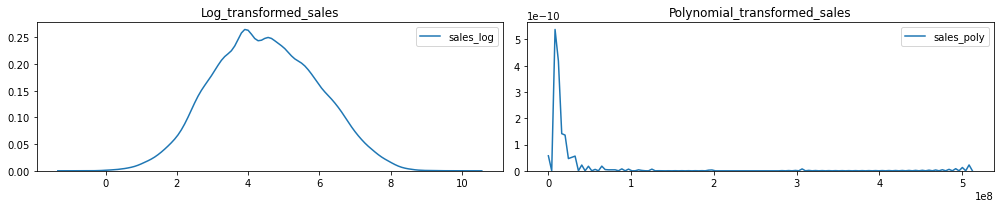

In [13]:
fig, axes = plt.subplots(1,2,figsize=(14, 3))

### Plotting kernerl density plot
sns.kdeplot(sales['sales_log'],ax=axes[0])
axes[0].set_title('Log_transformed_sales')  # Set the title for the first subplot

sns.kdeplot(sales['sales_poly'],ax=axes[1])
axes[1].set_title('Polynomial_transformed_sales')  # Set the title for the first subplot

plt.tight_layout()
plt.show()